In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) =cifar10.load_data() 

170508288/170498071 [==============================] - 2s 0us/step


###Scaling dataset

In [7]:
X_train[0].max()

255

In [8]:
X_test[0].max()

255

In [9]:
# We can scale the data to the range between 0 and 1 by dividing it by 255.

X_test = X_test/255
X_train = X_train/255

In [14]:
# TO find the number of unique elements in the output labels

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### Building models

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [22]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),
                 padding='valid', input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd covolutional layer due to too much information in color image
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),
                 padding='valid', input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # Flatten 32*32*3 to 3072

model.add(Dense(units=256, activation='relu')) # More neurons since its color image

model.add(Dense(units=10, activation='softmax')) # Output layer and Multi Class classifaction

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [25]:
# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#Defining Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [28]:
# Executing the model

model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
          callbacks=[early_stop], epochs=15)

Epoch 1/15
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4859 - accuracy: 0.4631 - val_loss: 1.2967 - val_accuracy: 0.5392
Epoch 2/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1630 - accuracy: 0.5907 - val_loss: 1.1364 - val_accuracy: 0.6049
Epoch 3/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0104 - accuracy: 0.6441 - val_loss: 1.0584 - val_accuracy: 0.6257
Epoch 4/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9033 - accuracy: 0.6838 - val_loss: 0.9950 - val_accuracy: 0.6529
Epoch 5/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8211 - accuracy: 0.7119 - val_loss: 1.0369 - val_accuracy: 0.6439
Epoch 6/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7470 - accuracy: 0.7378 - val_loss: 0.9333 - val_accuracy: 0.6796
Epoch 7/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6851 - accuracy: 0.7610 - val_loss: 0.9598 -

### Evalation of model

In [29]:
model_hist = pd.DataFrame(model.history.history)
model_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,1.485876,0.46314,1.296679,0.5392
1,1.163003,0.59066,1.136401,0.6049
2,1.010381,0.64410,1.058427,0.6257
3,0.903305,0.68382,0.994970,0.6529
4,0.821096,0.71188,1.036869,0.6439


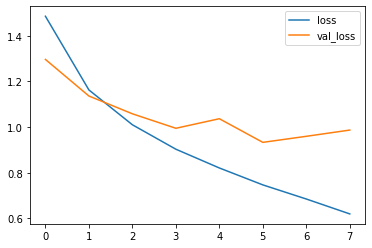

In [31]:
model_hist[['loss', 'val_loss']].plot()

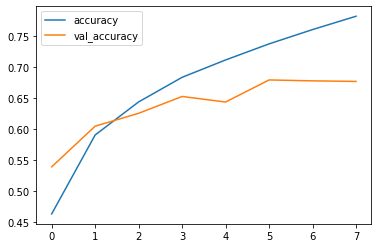

In [32]:
model_hist[['accuracy','val_accuracy']].plot()

In [41]:
# model.predict_classes() is deprecated and will be removed after 2021-01-01. Please use instead:* np.argmax(model.predict(x), axis=-1), 
# if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
# (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

y_pred = model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([3, 1, 8, ..., 5, 4, 7])

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      1000
           1       0.83      0.78      0.80      1000
           2       0.60      0.53      0.56      1000
           3       0.51      0.47      0.49      1000
           4       0.53      0.71      0.61      1000
           5       0.54      0.64      0.58      1000
           6       0.77      0.76      0.76      1000
           7       0.71      0.76      0.73      1000
           8       0.80      0.76      0.78      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



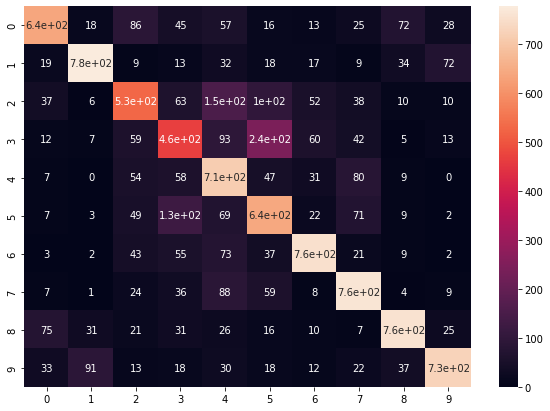

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, classes_x), annot=True)